In [7]:
# This is just to enable improting the generated SDK from the examples folder in the pygen repository
import sys
import warnings

from tests.constants import REPO_ROOT

warnings.filterwarnings("ignore")

sys.path.append(str(REPO_ROOT / "examples"))

# Working with Time Series

To demonstrate working with time series, we notice that `SensorTimeSeries` is an extension of `CogniteTimeSeries` in the `WindTurbine` model

<img src="images/windturbine_model.png" width="800">

In [8]:
from wind_turbine import WindTurbineClient

In [9]:
pygen = WindTurbineClient.from_toml("config.toml")

## Listing timeseries

We can list the timeseries directly with the `sensor_time_series` attribute

In [10]:
timeseries = pygen.sensor_time_series.list(limit=5)
timeseries

,space,external_id,aliases,concept_id,description,is_step,name,source_unit,standard_name,type_,data_record
0,sp_wind,V52-WindTurbine.Gear_D_Z,[Gearbox Displacement],http://purl.org/aspect/gearbox_displacement,Gearbox Displacement Z (laser sensor) (not cal...,False,Gear_D_Z,V,gearbox_displacement,numeric,"{'version': 1, 'last_updated_time': 2024-11-16..."
1,sp_wind,V52-WindTurbine.MyA4_O,[Edgewise Bending Moment],http://purl.org/aspect/edgewise_bending_moment,Edgewise Bend. Mom. Blade A R6.6m Offset,False,MyA4_O,kNm,edgewise_bending_moment,numeric,"{'version': 1, 'last_updated_time': 2024-11-16..."
2,sp_wind,V52-WindTurbine.cnt0,[Low Speed Shaft Rotational Speed],http://purl.org/aspect/low_speed_shaft_rotatio...,"Revolution per minutes of the low speed shaft,...",False,cnt0,RPM,low_speed_shaft_rotational_speed,numeric,"{'version': 1, 'last_updated_time': 2024-11-16..."
3,sp_wind,witznitz_efficiency,[Witznitz Efficiency],http://purl.org/aspect/solarPanel/efficiency,Witznitz Efficiency,False,Witznitz Efficiency,percent,Witznitz Efficiency,numeric,"{'version': 1, 'last_updated_time': 2024-11-16..."
4,sp_wind,V52-WindTurbine.MxA4_O,[Flapwise Bending Moment],http://purl.org/aspect/flapwise_bending_moment,Flapwise Bend. Mom. Blade A R6.6m Offset,False,MxA4_O,kNm,flapwise_bending_moment,numeric,"{'version': 1, 'last_updated_time': 2024-11-16..."


## Retriving Data Points

To retrieve data points we use the `.select()` method in the same way as when we do regular queries.

For example, if we want to view the `rotor_speed_controller` of the rotor for the `hornsea_1_mill_1` turbine:

In [11]:
df = (
    pygen.wind_turbine.select()
    .name.equals("hornsea_1_mill_1")
    .rotor.rotor_speed_controller.data.retrieve_dataframe(limit=100)
)
df

,"NodeId(sp_wind, V52-WindTurbine.ROT)"
2018-01-01 16:00:00.020,23.6999
2018-01-01 16:00:00.040,23.6999
2018-01-01 16:00:00.060,23.6999
2018-01-01 16:00:00.080,23.6999
2018-01-01 16:00:00.100,23.6999
...,...
2018-01-01 16:00:01.920,24.0995
2018-01-01 16:00:01.940,24.0995
2018-01-01 16:00:01.960,24.0995
2018-01-01 16:00:01.980,24.0995


## Retrieving <code>pandas</code> DataFrame in Time Zone

In [14]:
from zoneinfo import ZoneInfo

In [15]:
tz = ZoneInfo("Europe/Oslo")

In [18]:
df = (
    pygen.wind_turbine.select()
    .name.equals("hornsea_1_mill_1")
    .rotor.rotor_speed_controller.data.retrieve_dataframe(limit=1_000, timezone=tz)
)
df

,"NodeId(sp_wind, V52-WindTurbine.ROT)"
2018-01-01 17:00:00.020000+01:00,23.6999
2018-01-01 17:00:00.040000+01:00,23.6999
2018-01-01 17:00:00.060000+01:00,23.6999
2018-01-01 17:00:00.080000+01:00,23.6999
2018-01-01 17:00:00.100000+01:00,23.6999
...,...
2018-01-01 17:00:19.920000+01:00,23.9998
2018-01-01 17:00:19.940000+01:00,23.9998
2018-01-01 17:00:19.960000+01:00,23.9998
2018-01-01 17:00:19.980000+01:00,23.9998


## Plotting Timeseries

`pandas` has built in plotting and thus just chose a retrive methods that returns a `pandas` DataFrame and call `.plot()` on it.

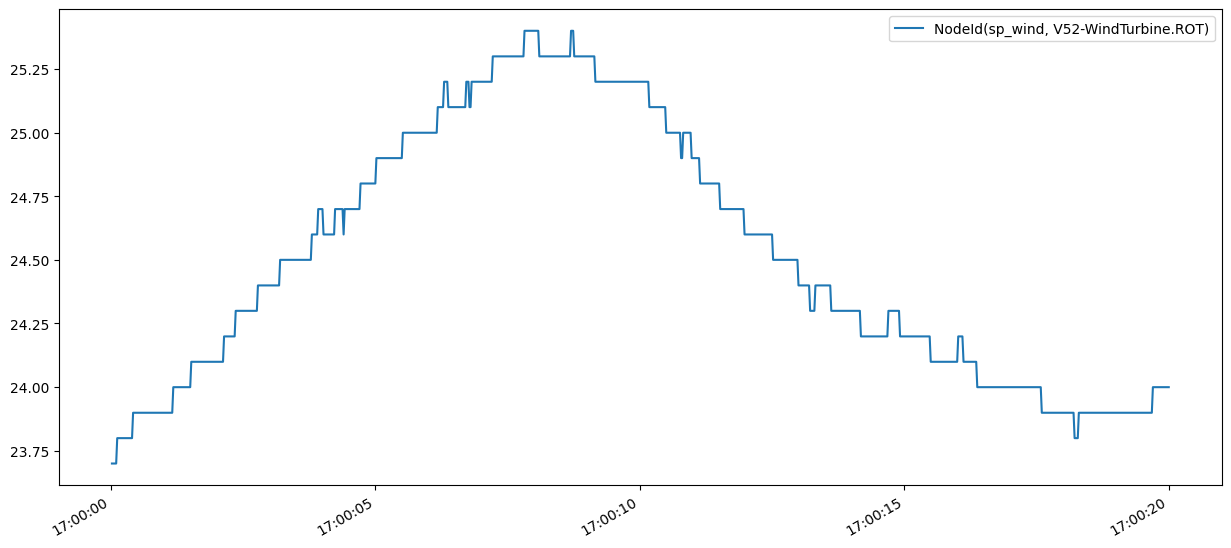

In [19]:
df.plot(figsize=(15, 7));